In [78]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Part A: Q1 - Q6

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Changing categorical famhist column to numerical
# conversion = {"famhist": {'Present': 1, 'Absent': 0}}
# df = df.replace(conversion)

# One-hot-encoding
one_hot = pd.get_dummies(df['famhist'])
# Drop column B as it is now encoded
df = df.drop('famhist', axis = 1)
# Join the encoded df
df = df.join(one_hot)

features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'Absent', 'Present', 'typea', 'obesity', 'alcohol', 'age']
X = df[features]
y = df['chd']

# Separating dataframe into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [82]:
# KMeans clustering with 2 clusters for chd 0 and chd 1
cluster = KMeans(n_clusters=2)
cluster.fit(X_train)
y_predict = cluster.predict(X_test)

# Q1. Accuracy calculation using sklearn.metrics accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.6147186147186147

<AxesSubplot:title={'center':'Actual tobacco vs sbp clustering'}, xlabel='tobacco', ylabel='sbp'>

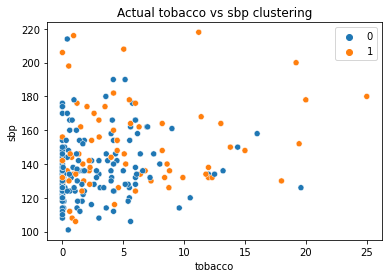

In [83]:
# Q2. Actual labels sbp vs tobacco plot
plt.title('Actual tobacco vs sbp clustering')
sns.scatterplot(x=X_test['tobacco'], y=X_test['sbp'], hue=y_test)

<AxesSubplot:title={'center':'Predicted tobacco vs sbp clustering'}, xlabel='tobacco', ylabel='sbp'>

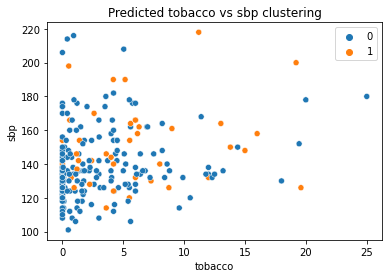

In [84]:
# Q3. Predicted labels sbp vs tobacco plot
plt.title('Predicted tobacco vs sbp clustering')
sns.scatterplot(x=X_test['tobacco'], y=X_test['sbp'], hue=y_predict)

In [85]:
import keras
from keras import layers
from tensorflow.keras.utils import to_categorical

In [86]:
# Converting numerical labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [87]:
# Building model based off of given structure
def build_model(activation):
    model = keras.Sequential(
    [
        layers.Dense(500, activation=activation, input_dim=10),
        layers.Dense(500, activation=activation),
        layers.Dense(128, activation=activation),
        layers.Dense(2, activation='softmax')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    
    return model

In [88]:
model_one = build_model('relu')

model_one.fit(X_train, y_train, epochs=35, batch_size=12)

y_predicted = model_one.predict(X_test)

Epoch 1/35
20/20 [==============================] - 1s 2ms/step - loss: 3.8152 - accuracy: 0.6044
Epoch 2/35
20/20 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.6434
Epoch 3/35
20/20 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.6598
Epoch 4/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6058
Epoch 5/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6142
Epoch 6/35
20/20 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.5912
Epoch 7/35
20/20 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6745
Epoch 8/35
20/20 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.6835
Epoch 9/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6102
Epoch 10/35
20/20 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.6859
Epoch 11/35
20/20 [

In [89]:
# Converting categorical values to numerical
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
y_predicted = np.argmax(y_predicted, axis=1)

<AxesSubplot:title={'center':'Actual tobacco vs sbp plot'}, xlabel='tobacco', ylabel='sbp'>

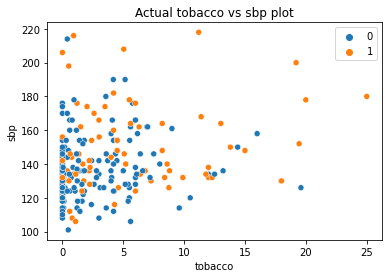

In [90]:
# Q5. Plotting actual data points
plt.title('Actual tobacco vs sbp plot')
sns.scatterplot(x=X_test['tobacco'], y=X_test['sbp'], hue=y_test)

<AxesSubplot:title={'center':'Predicted tobacco vs sbp plot'}, xlabel='tobacco', ylabel='sbp'>

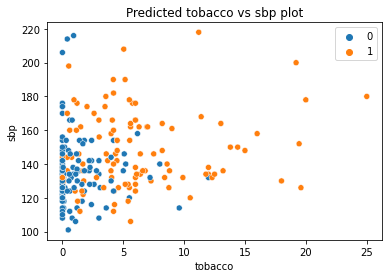

In [91]:
# Q6. Plotting predicted data points
plt.title('Predicted tobacco vs sbp plot')
sns.scatterplot(x=X_test['tobacco'], y=X_test['sbp'], hue=y_predicted)

## Part B: Q7 - Q14

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X)
variance = pca.explained_variance_ 
print(variance)

variation, count = 0, 0
for i in range(len(variance)):
    variation += (variance[i] / sum(variance) * 100)
    count += 1
    # Q7. How many PCs explain more than 90% variation?    
    if variation >= 90:
        print(f'{count} PCs explain more than 90% variation')
        break
    # Q8. How much variation is explained by the first two PCs
    if i == 1:
        print(f'{round(variation, 2)}% variation is explained by the first two PCs')
    

[3.08018587e+00 1.76362897e+00 1.19972794e+00 1.05534542e+00
 8.47400692e-01 7.63214154e-01 6.70033863e-01 4.66889801e-01
 1.75265258e-01 3.30622134e-32]
48.33% variation is explained by the first two PCs
7 PCs explain more than 90% variation


In [96]:
principal_components = pd.DataFrame(data=principal_components)
first_seven = principal_components.iloc[:, 0:7]
first_seven
X_train = first_seven.iloc[:231]
X_test = first_seven.iloc[231:]
X_test

,0,1,2,3,4,5,6
231,1.760424,-2.227116,-0.023184,-0.621219,1.683882,-0.729811,-0.383023
232,0.541017,-1.572094,-1.114913,-0.368822,0.114140,-0.279404,-0.532030
233,-1.778640,-0.451651,-0.835591,0.040642,0.008579,-0.057429,-0.301095
234,-0.936045,-0.708095,1.082162,2.229411,-1.922366,-0.792519,0.512909
235,0.510093,-1.633253,0.972613,0.116036,2.271597,-0.412606,-1.438553
...,...,...,...,...,...,...,...
457,1.474825,-2.109665,-0.525988,0.286076,-0.707522,3.366483,0.906561
458,0.969534,-1.931355,0.415127,-0.081735,-0.779565,1.435715,0.042246
459,-2.178174,-0.186814,1.689230,-1.031250,0.301334,-0.967001,-0.648036
460,0.700929,-1.378982,-1.717431,1.234978,1.483315,-1.468174,2.058030


In [97]:
# Clustering first seven PCs
cluster_two = KMeans(n_clusters=2)
cluster_two.fit(X_train)
y_predict_two = cluster_two.predict(X_test)

# Q9. Accuracy
accuracy = accuracy_score(y_test, y_predict_two)
accuracy

0.645021645021645

<AxesSubplot:title={'center':'Actual PC1 vs PC2 clustering'}, xlabel='0', ylabel='1'>

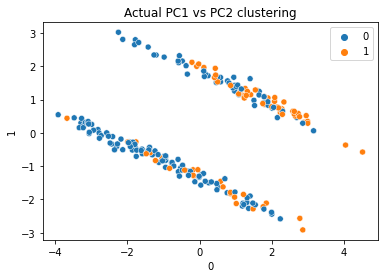

In [98]:
# Q10. Actual labels sbp vs tobacco plot
plt.title('Actual PC1 vs PC2 clustering')
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=y_test)

<AxesSubplot:title={'center':'Predicted PC1 vs PC2 clustering'}, xlabel='0', ylabel='1'>

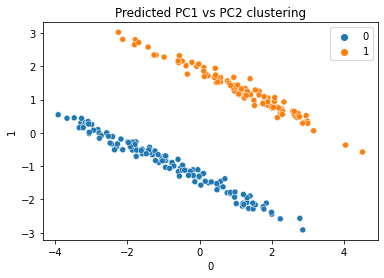

In [99]:
# Q11. Predicted labels sbp vs tobacco plot
plt.title('Predicted PC1 vs PC2 clustering')
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=y_predict_two)

In [100]:
# Building model based off of given structure
def build_model_two(activation):
    model = keras.Sequential(
    [
        layers.Dense(500, activation=activation, input_dim=7),
        layers.Dense(500, activation=activation),
        layers.Dense(128, activation=activation),
        layers.Dense(2, activation='softmax')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    
    return model

In [101]:
# Converting numerical labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [102]:
model_two = build_model_two('relu')

model_two.fit(X_train, y_train, epochs=35, batch_size=12)

# Q12. Accuracy given with every epoch
y_predicted_two = model_two.predict(X_test)

Epoch 1/35
20/20 [==============================] - 1s 1ms/step - loss: 0.6342 - accuracy: 0.6159
Epoch 2/35
20/20 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7592
Epoch 3/35
20/20 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7551
Epoch 4/35
20/20 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.7929
Epoch 5/35
20/20 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7529
Epoch 6/35
20/20 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8012
Epoch 7/35
20/20 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8115
Epoch 8/35
20/20 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8188
Epoch 9/35
20/20 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8498
Epoch 10/35
20/20 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8589
Epoch 11/35
20/20 [

In [103]:
# Converting categorical values to numerical
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
y_predicted_two = np.argmax(y_predicted_two, axis=1)

<AxesSubplot:title={'center':'Actual PC1 vs PC2 clustering'}, xlabel='0', ylabel='1'>

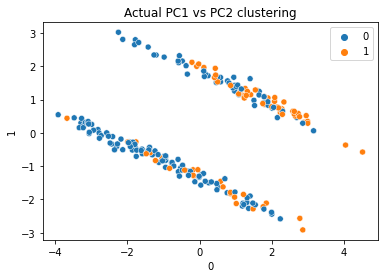

In [104]:
# Q13. Actual labels sbp vs tobacco plot
plt.title('Actual PC1 vs PC2 clustering')
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=y_test)

<AxesSubplot:title={'center':'Predicted PC1 vs PC2 clustering'}, xlabel='0', ylabel='1'>

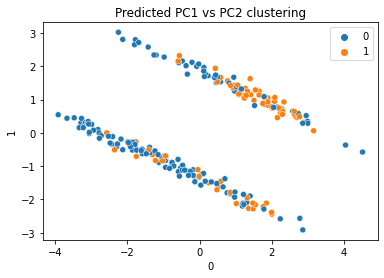

In [105]:
# Q14. Predicted labels sbp vs tobacco plot
plt.title('Predicted PC1 vs PC2 clustering')
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=y_predicted_two)